# IOD-project_1
# FILM GENRE, BEST BET - Demonstrated Learning of Exploratory Data Analysis
## MAY 2024

## Project Overview
This was the first of four projects designed to reinforce and demonstrate my learning as part of the Institute of Data, Data Science & AI program. I chose a fictional problem of two independent filmmakers (my instructors) who approached me with the business question of which genre would be the 'safest' bet for them to pursue when developing their first feature film.

- **Datasets used are included in this repository**
- **Presentation media available on:** ds-cjasonohara.com

### Data Used
- **kaggle.com, IMDb Top 1000 Films, csv**: Right-sized, easy to work with, free
- **wikipedia.org, Unesco Institute for Statistics - Average Ticket Price**: Used US prices only; Where null, averaged between prior year & year following; Where null at start or end of data, used % increase/decrease for year(s) prior

### Data Wrangling
#### Kaggle Dataset
- Converted to Pandas DF
- Isolated main_genre
- Dropped unnecessary columns and null-value rows
- Retained columns needed for analysis
- Nulls were in the 16% ('Meta_score') and 17% ('Gross') range, respectively. Typically too high to drop
- Opted to replace 'Meta_score' nulls with mean and drop the 'Gross' nulls. Predictive Imputation for 'Gross' in the future?

In [1]:
#Import the necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Using Pandas, read the csv file, convert to a DataFrame, and display the first 5 rows
df = pd.read_csv('imdb_top_1000.csv')
df.head()



,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
1,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [3]:
#Get the shape of the DataFrame
df.shape

(1000, 16)

In [4]:
#Create a new Index Column for the DataFrame
df['Index'] = np.arange(1, 1001)
df.set_index('Index', inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Index,,,,,,,,,,,,,,,,
1,https://m.media-amazon.com/images/M/MV5BMDFkYT...,The Shawshank Redemption,1994,A,142 min,Drama,9.3,Two imprisoned men bond over a number of years...,80.0,Frank Darabont,Tim Robbins,Morgan Freeman,Bob Gunton,William Sadler,2343110,"28,341,469"
2,https://m.media-amazon.com/images/M/MV5BM2MyNj...,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
3,https://m.media-amazon.com/images/M/MV5BMTMxNT...,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
4,https://m.media-amazon.com/images/M/MV5BMWMwMG...,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
5,https://m.media-amazon.com/images/M/MV5BMWU4N2...,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"


In [5]:
#Look at the Data Types of the Columns
df.dtypes

Poster_Link       object
Series_Title      object
Released_Year     object
Certificate       object
Runtime           object
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross             object
dtype: object

In [6]:
#Get a description about the DataFrame numerical values
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,1000.000000,843.000000,1.000000e+03
mean,7.949300,77.971530,2.736929e+05
std,0.275491,12.376099,3.273727e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.552625e+04
50%,7.900000,79.000000,1.385485e+05
75%,8.100000,87.000000,3.741612e+05
max,9.300000,100.000000,2.343110e+06


In [7]:
#What are the values in the 'Genre' column?
df['Genre'].value_counts()

Genre
Drama                        85
Drama, Romance               37
Comedy, Drama                35
Comedy, Drama, Romance       31
Action, Crime, Drama         30
                             ..
Adventure, Thriller           1
Animation, Action, Sci-Fi     1
Action, Crime, Comedy         1
Animation, Crime, Mystery     1
Adventure, Comedy, War        1
Name: count, Length: 202, dtype: int64

In [8]:
#Using a For Loop, get the unique values in the 'Genre' column
genres = []
for genre in df['Genre']:
    if genre not in genres:
        genres.append(genre)
genres

['Drama',
 'Crime, Drama',
 'Action, Crime, Drama',
 'Action, Adventure, Drama',
 'Biography, Drama, History',
 'Action, Adventure, Sci-Fi',
 'Drama, Romance',
 'Western',
 'Action, Sci-Fi',
 'Biography, Crime, Drama',
 'Action, Adventure, Fantasy',
 'Comedy, Drama, Thriller',
 'Adventure, Drama, Sci-Fi',
 'Animation, Adventure, Family',
 'Drama, War',
 'Crime, Drama, Fantasy',
 'Comedy, Drama, Romance',
 'Crime, Drama, Mystery',
 'Crime, Drama, Thriller',
 'Action, Drama, Mystery',
 'Drama, Family, Fantasy',
 'Drama, Music',
 'Biography, Comedy, Drama',
 'Drama, Mystery, Sci-Fi',
 'Biography, Drama, Music',
 'Crime, Mystery, Thriller',
 'Animation, Adventure, Drama',
 'Animation, Drama, War',
 'Adventure, Comedy, Sci-Fi',
 'Horror, Mystery, Thriller',
 'Drama, Romance, War',
 'Comedy, Drama, Family',
 'Animation, Drama, Fantasy',
 'Action, Biography, Drama',
 'Animation, Action, Adventure',
 'Drama, Western',
 'Action, Adventure',
 'Comedy, Drama',
 'Drama, Family',
 'Drama, Mystery, 

In [9]:
#What are the unique values in the 'Genre' column?
df['Genre'].unique()

array(['Drama', 'Crime, Drama', 'Action, Crime, Drama',
       'Action, Adventure, Drama', 'Biography, Drama, History',
       'Action, Adventure, Sci-Fi', 'Drama, Romance', 'Western',
       'Action, Sci-Fi', 'Biography, Crime, Drama',
       'Action, Adventure, Fantasy', 'Comedy, Drama, Thriller',
       'Adventure, Drama, Sci-Fi', 'Animation, Adventure, Family',
       'Drama, War', 'Crime, Drama, Fantasy', 'Comedy, Drama, Romance',
       'Crime, Drama, Mystery', 'Crime, Drama, Thriller',
       'Action, Drama, Mystery', 'Drama, Family, Fantasy', 'Drama, Music',
       'Biography, Comedy, Drama', 'Drama, Mystery, Sci-Fi',
       'Biography, Drama, Music', 'Crime, Mystery, Thriller',
       'Animation, Adventure, Drama', 'Animation, Drama, War',
       'Adventure, Comedy, Sci-Fi', 'Horror, Mystery, Thriller',
       'Drama, Romance, War', 'Comedy, Drama, Family',
       'Animation, Drama, Fantasy', 'Action, Biography, Drama',
       'Animation, Action, Adventure', 'Drama, Western',


In [11]:
#Sort the DataFrame by the 'Genre' column
df.sort_values('Genre', inplace=True)
df.head()

,Poster_Link,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Index,,,,,,,,,,,,,,,,
169,https://m.media-amazon.com/images/M/MV5BMjNkMz...,Indiana Jones and the Last Crusade,1989,U,127 min,"Action, Adventure",8.2,"In 1938, after his father Professor Henry Jone...",65.0,Steven Spielberg,Harrison Ford,Sean Connery,Alison Doody,Denholm Elliott,692366,"197,171,806"
156,https://m.media-amazon.com/images/M/MV5BOTY4Yj...,Batman Begins,2005,UA,140 min,"Action, Adventure",8.2,"After training with his mentor, Batman begins ...",70.0,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,"206,852,432"
73,https://m.media-amazon.com/images/M/MV5BMjA0OD...,Raiders of the Lost Ark,1981,A,115 min,"Action, Adventure",8.4,"In 1936, archaeologist and adventurer Indiana ...",85.0,Steven Spielberg,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies,884112,"248,159,971"
841,https://m.media-amazon.com/images/M/MV5BODBmOW...,First Blood,1982,A,93 min,"Action, Adventure",7.7,A veteran Green Beret is forced by a cruel She...,61.0,Ted Kotcheff,Sylvester Stallone,Brian Dennehy,Richard Crenna,Bill McKinney,226541,"47,212,904"
64,https://m.media-amazon.com/images/M/MV5BMTk4OD...,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,Eight years after the Joker's reign of anarchy...,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,"448,139,099"


In [12]:
#Clean up the DataFrame by dropping unnecessary columns - 'Poster_Link' and 'Overview'
df.drop(['Poster_Link', 'Overview'], axis=1, inplace=True)
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
Index,,,,,,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,U,127 min,"Action, Adventure",8.2,65.0,Steven Spielberg,Harrison Ford,Sean Connery,Alison Doody,Denholm Elliott,692366,"197,171,806"
156,Batman Begins,2005,UA,140 min,"Action, Adventure",8.2,70.0,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,"206,852,432"
73,Raiders of the Lost Ark,1981,A,115 min,"Action, Adventure",8.4,85.0,Steven Spielberg,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies,884112,"248,159,971"
841,First Blood,1982,A,93 min,"Action, Adventure",7.7,61.0,Ted Kotcheff,Sylvester Stallone,Brian Dennehy,Richard Crenna,Bill McKinney,226541,"47,212,904"
64,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,"448,139,099"


In [13]:
#I don't need the sub-genres in the 'Genre' column, so will need to pull out the main genre from the 'Genre' column
#Create a new column with the first (main) category in the 'Genre' column values
df['Genre'] = df['Genre'].astype(str)  # Ensure the column is a string
df['main_genre'] = df['Genre'].str.split(',').str[0]  # Extract all characters before the first comma
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross,main_genre
Index,,,,,,,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,U,127 min,"Action, Adventure",8.2,65.0,Steven Spielberg,Harrison Ford,Sean Connery,Alison Doody,Denholm Elliott,692366,"197,171,806",Action
156,Batman Begins,2005,UA,140 min,"Action, Adventure",8.2,70.0,Christopher Nolan,Christian Bale,Michael Caine,Ken Watanabe,Liam Neeson,1308302,"206,852,432",Action
73,Raiders of the Lost Ark,1981,A,115 min,"Action, Adventure",8.4,85.0,Steven Spielberg,Harrison Ford,Karen Allen,Paul Freeman,John Rhys-Davies,884112,"248,159,971",Action
841,First Blood,1982,A,93 min,"Action, Adventure",7.7,61.0,Ted Kotcheff,Sylvester Stallone,Brian Dennehy,Richard Crenna,Bill McKinney,226541,"47,212,904",Action
64,The Dark Knight Rises,2012,UA,164 min,"Action, Adventure",8.4,78.0,Christopher Nolan,Christian Bale,Tom Hardy,Anne Hathaway,Gary Oldman,1516346,"448,139,099",Action


In [14]:
#Drop the following columns: 'Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4', as they do not pertain to the analysis (indie filmmakers wouldn't have these)
df.drop(['Certificate', 'Director', 'Star1', 'Star2', 'Star3', 'Star4'], axis=1, inplace=True)
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,main_genre
Index,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,127 min,"Action, Adventure",8.2,65.0,692366,"197,171,806",Action
156,Batman Begins,2005,140 min,"Action, Adventure",8.2,70.0,1308302,"206,852,432",Action
73,Raiders of the Lost Ark,1981,115 min,"Action, Adventure",8.4,85.0,884112,"248,159,971",Action
841,First Blood,1982,93 min,"Action, Adventure",7.7,61.0,226541,"47,212,904",Action
64,The Dark Knight Rises,2012,164 min,"Action, Adventure",8.4,78.0,1516346,"448,139,099",Action


In [15]:
#Check for missing values
df.isnull().sum()

Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score       157
No_of_Votes        0
Gross            169
main_genre         0
dtype: int64

In [16]:
#Let's understand the how the missing values affect the total number of rows
#Calculate the percentage of missing values in Metascore and Gross columns
missing_metascore = (157/1000) * 100
missing_gross = (169/1000) * 100
print(missing_metascore, missing_gross)

15.7 16.900000000000002


In [17]:
#Let's address the missing values in the 'Meta_score' column
#Replace the missing values with the mean of the 'Meta_score' column
df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)
df.isnull().sum()


/var/folders/gr/0cyzht9j16g818rxhk08kvnr0000gn/T/ipykernel_80853/3964246112.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Meta_score'].fillna(df['Meta_score'].mean(), inplace=True)


Series_Title       0
Released_Year      0
Runtime            0
Genre              0
IMDB_Rating        0
Meta_score         0
No_of_Votes        0
Gross            169
main_genre         0
dtype: int64

In [20]:
#Drop the rows with missing values in the 'Gross' column
df.dropna(subset=['Gross'], inplace=True)
df.isnull().sum()

Series_Title     0
Released_Year    0
Runtime          0
Genre            0
IMDB_Rating      0
Meta_score       0
No_of_Votes      0
Gross            0
main_genre       0
dtype: int64

In [23]:
#Check the shape of the DataFrame
df.shape

(831, 9)

In [25]:
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,main_genre
Index,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,127 min,"Action, Adventure",8.2,65.0,692366,"197,171,806",Action
156,Batman Begins,2005,140 min,"Action, Adventure",8.2,70.0,1308302,"206,852,432",Action
73,Raiders of the Lost Ark,1981,115 min,"Action, Adventure",8.4,85.0,884112,"248,159,971",Action
841,First Blood,1982,93 min,"Action, Adventure",7.7,61.0,226541,"47,212,904",Action
64,The Dark Knight Rises,2012,164 min,"Action, Adventure",8.4,78.0,1516346,"448,139,099",Action


### Typically the percentage of nulls for gross would be too high to drop, however, timing is a factor here. Consider predictive imputation in the future.

#### UNESCO Dataset
- Converted to Pandas DataFrame
- Assumptions made before importing data
- Used US average ticket sale price only

In [26]:
#Bring in the 'avg_ticket_price-by_yr' file
avg_ticket_price = pd.read_csv('avg_ticket_price-by_yr.csv')

In [27]:
avg_ticket_price.head()

,YEAR,WORLDWIDE(US),US,UK,AUS,CHINA,EU,FRANCE,HONG KONG,INDIA,JAPAN,UAE,USSR/RUSSIA
0,1950,NaN,0.46,£0.08 ($0.22),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.75 Rbls[60] ($0.33)
1,1951,NaN,0.53,£0.08 ($0.22),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1952,NaN,0.57,£0.08 ($0.22),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1953,NaN,0.60,£0.08 ($0.22),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1954,NaN,0.45,£0.09 ($0.25),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
#We're going to keep the focus on US prices for this analysis.
#Drop the following columns from the avg_ticket_price_df: 'WORLDWIDE(US)', 'UK', 'AUS', 'CHINA', 'EU', 'FRANCE', 'HONG KONG', 'INDIA', 'JAPAN', 'UAE', 'USSR/RUSSIA'
avg_ticket_price.drop(['WORLDWIDE(US)', 'UK', 'AUS', 'CHINA', 'EU', 'FRANCE', 'HONG KONG', 'INDIA', 'JAPAN', 'UAE', 'USSR/RUSSIA'], axis=1, inplace=True)
avg_ticket_price.head()

,YEAR,US
0,1950,0.46
1,1951,0.53
2,1952,0.57
3,1953,0.60
4,1954,0.45


### Now, let's merge the two dataframes

In [30]:
print(df.columns)
print(avg_ticket_price.columns)

Index(['Series_Title', 'Released_Year', 'Runtime', 'Genre', 'IMDB_Rating',
       'Meta_score', 'No_of_Votes', 'Gross', 'main_genre'],
      dtype='object')
Index(['YEAR', 'US'], dtype='object')


In [31]:
#Using the 'YEAR' column in the avg_ticket_price_df and the 'Realeased_Year' column in the df, create a new column 'avg_ticket' in the df that shows the average ticket price for each movie
df['avg_ticket'] = df['Released_Year'].map(avg_ticket_price.set_index('YEAR')['US'])
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,main_genre,avg_ticket
Index,,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,127 min,"Action, Adventure",8.2,65.0,692366,"197,171,806",Action,3.97
156,Batman Begins,2005,140 min,"Action, Adventure",8.2,70.0,1308302,"206,852,432",Action,6.41
73,Raiders of the Lost Ark,1981,115 min,"Action, Adventure",8.4,85.0,884112,"248,159,971",Action,2.78
841,First Blood,1982,93 min,"Action, Adventure",7.7,61.0,226541,"47,212,904",Action,2.94
64,The Dark Knight Rises,2012,164 min,"Action, Adventure",8.4,78.0,1516346,"448,139,099",Action,7.96


In [33]:
#Review to validate the new column
avg_ticket_price.head(40)

,YEAR,US
0,1950,0.46
1,1951,0.53
2,1952,0.57
3,1953,0.60
4,1954,0.45
5,1955,0.48
6,1956,0.50
7,1957,0.51
8,1958,0.51
9,1959,0.51


### Feature Engineering
- After merging the two datasets, created a new column to determine # of tickets sold
- Used new column to help determine which genres would be most-likely to make money
- Using the mean, looked for comparisons between 'Main_genre' and 'IMDb_Rating', 'Meta_Score', 'Tickets_Sold', 'No_of_Votes'
- Compared against median to account for outliers, but it did not significantly change the outcome

In [34]:
#Convert the 'Gross' column to a float
df['Gross'] = df['Gross'].str.replace(',', '').str.replace('$', '').astype(float)
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,main_genre,avg_ticket
Index,,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,127 min,"Action, Adventure",8.2,65.0,692366,197171806.0,Action,3.97
156,Batman Begins,2005,140 min,"Action, Adventure",8.2,70.0,1308302,206852432.0,Action,6.41
73,Raiders of the Lost Ark,1981,115 min,"Action, Adventure",8.4,85.0,884112,248159971.0,Action,2.78
841,First Blood,1982,93 min,"Action, Adventure",7.7,61.0,226541,47212904.0,Action,2.94
64,The Dark Knight Rises,2012,164 min,"Action, Adventure",8.4,78.0,1516346,448139099.0,Action,7.96


In [35]:
#Create a new column that divides the 'Gross' column by the 'avg_ticket' column
df['Tickets_Sold'] = df['Gross'] / df['avg_ticket']
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,main_genre,avg_ticket,Tickets_Sold
Index,,,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,127 min,"Action, Adventure",8.2,65.0,692366,197171806.0,Action,3.97,4.966544e+07
156,Batman Begins,2005,140 min,"Action, Adventure",8.2,70.0,1308302,206852432.0,Action,6.41,3.227027e+07
73,Raiders of the Lost Ark,1981,115 min,"Action, Adventure",8.4,85.0,884112,248159971.0,Action,2.78,8.926618e+07
841,First Blood,1982,93 min,"Action, Adventure",7.7,61.0,226541,47212904.0,Action,2.94,1.605881e+07
64,The Dark Knight Rises,2012,164 min,"Action, Adventure",8.4,78.0,1516346,448139099.0,Action,7.96,5.629888e+07


In [36]:
#Format the 'Tickets_Sold' column to 2 decimal places
df['Tickets_Sold'] = df['Tickets_Sold'].round(2)
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,main_genre,avg_ticket,Tickets_Sold
Index,,,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,127 min,"Action, Adventure",8.2,65.0,692366,197171806.0,Action,3.97,49665442.32
156,Batman Begins,2005,140 min,"Action, Adventure",8.2,70.0,1308302,206852432.0,Action,6.41,32270270.20
73,Raiders of the Lost Ark,1981,115 min,"Action, Adventure",8.4,85.0,884112,248159971.0,Action,2.78,89266176.62
841,First Blood,1982,93 min,"Action, Adventure",7.7,61.0,226541,47212904.0,Action,2.94,16058810.88
64,The Dark Knight Rises,2012,164 min,"Action, Adventure",8.4,78.0,1516346,448139099.0,Action,7.96,56298881.78


### EDA Visualization
- Used Matplotlib to visualize the results
- Opted for a simple bar chart as that was the most effective in demonstrating the outcomes

In [37]:
#Get the unique values in the 'main_genre' column
df['main_genre'].unique()

array(['Action', 'Adventure', 'Animation', 'Biography', 'Comedy', 'Crime',
       'Drama', 'Family', 'Film-Noir', 'Horror', 'Mystery', 'Thriller',
       'Western'], dtype=object)

In [38]:
#Get the mean IMDb rating for each main genre
df.groupby('main_genre')['IMDB_Rating'].mean()

main_genre
Action       7.948227
Adventure    7.936066
Animation    7.922388
Biography    7.925316
Comedy       7.900781
Crime        8.021505
Drama        7.949145
Family       7.800000
Film-Noir    8.050000
Horror       7.930000
Mystery      8.066667
Thriller     7.800000
Western      8.350000
Name: IMDB_Rating, dtype: float64

In [39]:
#Get the mean Meta Score for each main genre
df.groupby('main_genre')['Meta_score'].mean()

main_genre
Action       73.692814
Adventure    77.588764
Animation    81.655442
Biography    76.301635
Comedy       78.081712
Crime        76.888800
Drama        78.693540
Family       79.000000
Film-Noir    96.500000
Horror       79.300000
Mystery      76.771451
Thriller     81.000000
Western      78.250000
Name: Meta_score, dtype: float64

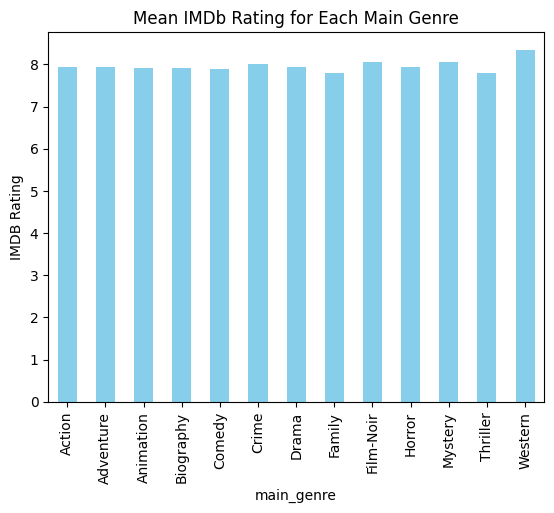

In [41]:
#Visualize the mean IMDb rating for each main genre
df.groupby('main_genre')['IMDB_Rating'].mean().plot(kind='bar', color='skyblue')
plt.ylabel('IMDB Rating')
plt.title('Mean IMDb Rating for Each Main Genre')
plt.show()

In [42]:
#Get the minimum IMDb rating for each main genre
df.groupby('main_genre')['IMDB_Rating'].min()

main_genre
Action       7.6
Adventure    7.6
Animation    7.6
Biography    7.6
Comedy       7.6
Crime        7.6
Drama        7.6
Family       7.8
Film-Noir    8.0
Horror       7.6
Mystery      7.6
Thriller     7.8
Western      7.8
Name: IMDB_Rating, dtype: float64

In [43]:
#Get the maximum IMDb rating for each main genre
df.groupby('main_genre')['IMDB_Rating'].max()

main_genre
Action       9.0
Adventure    8.6
Animation    8.6
Biography    8.9
Comedy       8.6
Crime        9.2
Drama        9.3
Family       7.8
Film-Noir    8.1
Horror       8.5
Mystery      8.4
Thriller     7.8
Western      8.8
Name: IMDB_Rating, dtype: float64

In [44]:
#Convert "Runtime' type to integer
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)

In [45]:
#Get the minimum runtime for each main genre
df.groupby('main_genre')['Runtime'].min()

main_genre
Action        45
Adventure     88
Animation     71
Biography     98
Comedy        68
Crime         81
Drama         75
Family       100
Film-Noir    100
Horror        91
Mystery      100
Thriller     108
Western      132
Name: Runtime, dtype: int64

In [46]:
#Get the maximum runtime for each main genre
df.groupby('main_genre')['Runtime'].max()

main_genre
Action       207
Adventure    228
Animation    137
Biography    209
Comedy       188
Crime        229
Drama        242
Family       115
Film-Noir    104
Horror       122
Mystery      138
Thriller     108
Western      165
Name: Runtime, dtype: int64

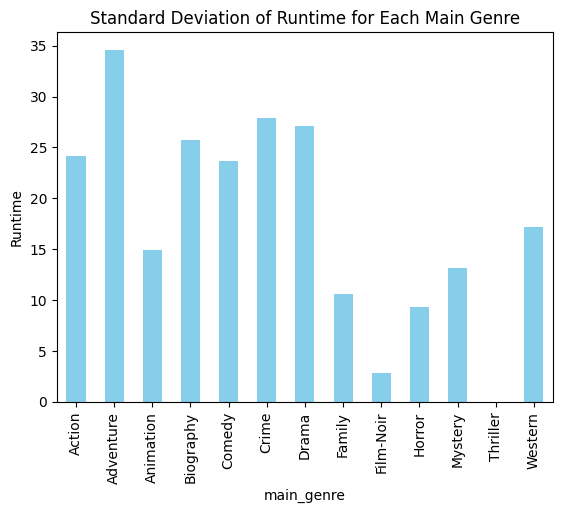

In [48]:
#Visualize the std of the runtime for each main genre
df.groupby('main_genre')['Runtime'].std().plot(kind='bar', color='skyblue')
plt.ylabel('Runtime')
plt.title('Standard Deviation of Runtime for Each Main Genre')
plt.show()

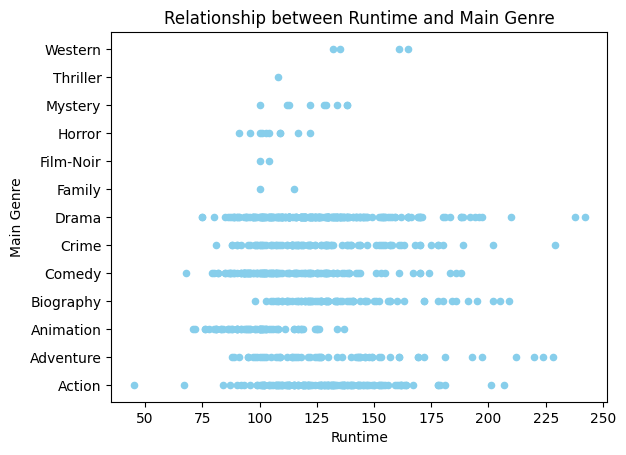

In [49]:
#Use a scatter plot to show the relationship between the runtime and main genre
df.plot.scatter(x='Runtime', y='main_genre', color='skyblue')
plt.xlabel('Runtime')
plt.ylabel('Main Genre')
plt.title('Relationship between Runtime and Main Genre')
plt.show()

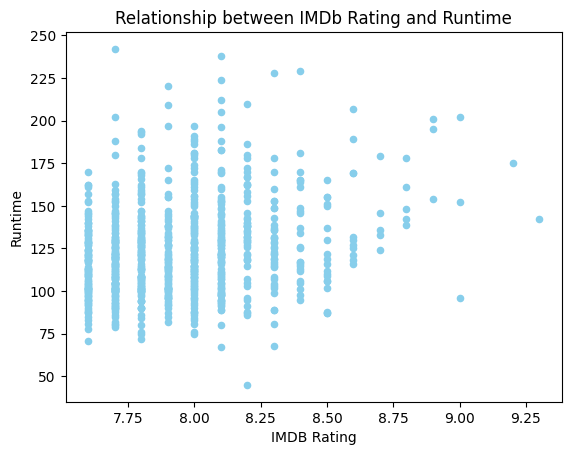

In [51]:
#Use a scatter plot to show the relationship between the IMDb rating and runtime
df.plot.scatter(x='IMDB_Rating', y='Runtime', color='skyblue')
plt.xlabel('IMDB Rating')
plt.ylabel('Runtime')
plt.title('Relationship between IMDb Rating and Runtime')
plt.show()

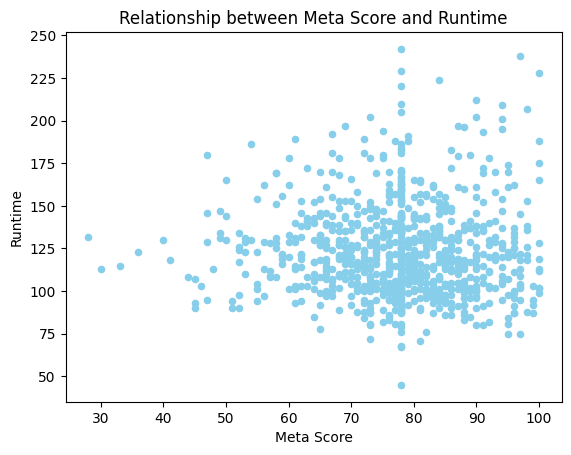

In [53]:
#Use a scatter plot to show the relationship between the Meta Score and runtime
df.plot.scatter(x='Meta_score', y='Runtime', color='skyblue')
plt.xlabel('Meta Score')
plt.ylabel('Runtime')
plt.title('Relationship between Meta Score and Runtime')
plt.show()

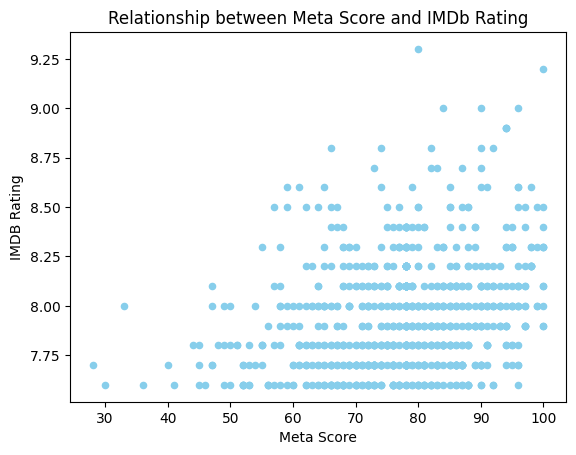

In [54]:
#Use a scatter plot to show the relationship between the Meta_score and IMDb_Rating
df.plot.scatter(x='Meta_score', y='IMDB_Rating', color='skyblue')
plt.xlabel('Meta Score')
plt.ylabel('IMDB Rating')
plt.title('Relationship between Meta Score and IMDb Rating')
plt.show()

In [55]:
#Calculate the correlation between the Meta_score and IMDb_Rating
df['Meta_score'].corr(df['IMDB_Rating'])

0.27578103146808824

In [56]:
#Calculate the correlation between the Meta_score and Runtime
df['Meta_score'].corr(df['Runtime'])

-0.00987632408443101

In [57]:
#Calculate the correlation between the IMDb_Rating and Runtime
df['IMDB_Rating'].corr(df['Runtime'])

0.2467564121408852

In [58]:
#calculate the correlation between the Tickets_Sold and Runtime
df['Tickets_Sold'].corr(df['Runtime'])

0.1889851301339286

In [59]:
#calculate the correlation between the Tickets_Sold and Meta_score
df['Tickets_Sold'].corr(df['Meta_score'])

0.07747317859121308

In [60]:
#calculate the correlation between the Tickets_Sold and IMDb_Rating
df['Tickets_Sold'].corr(df['IMDB_Rating'])

0.17364346426039642

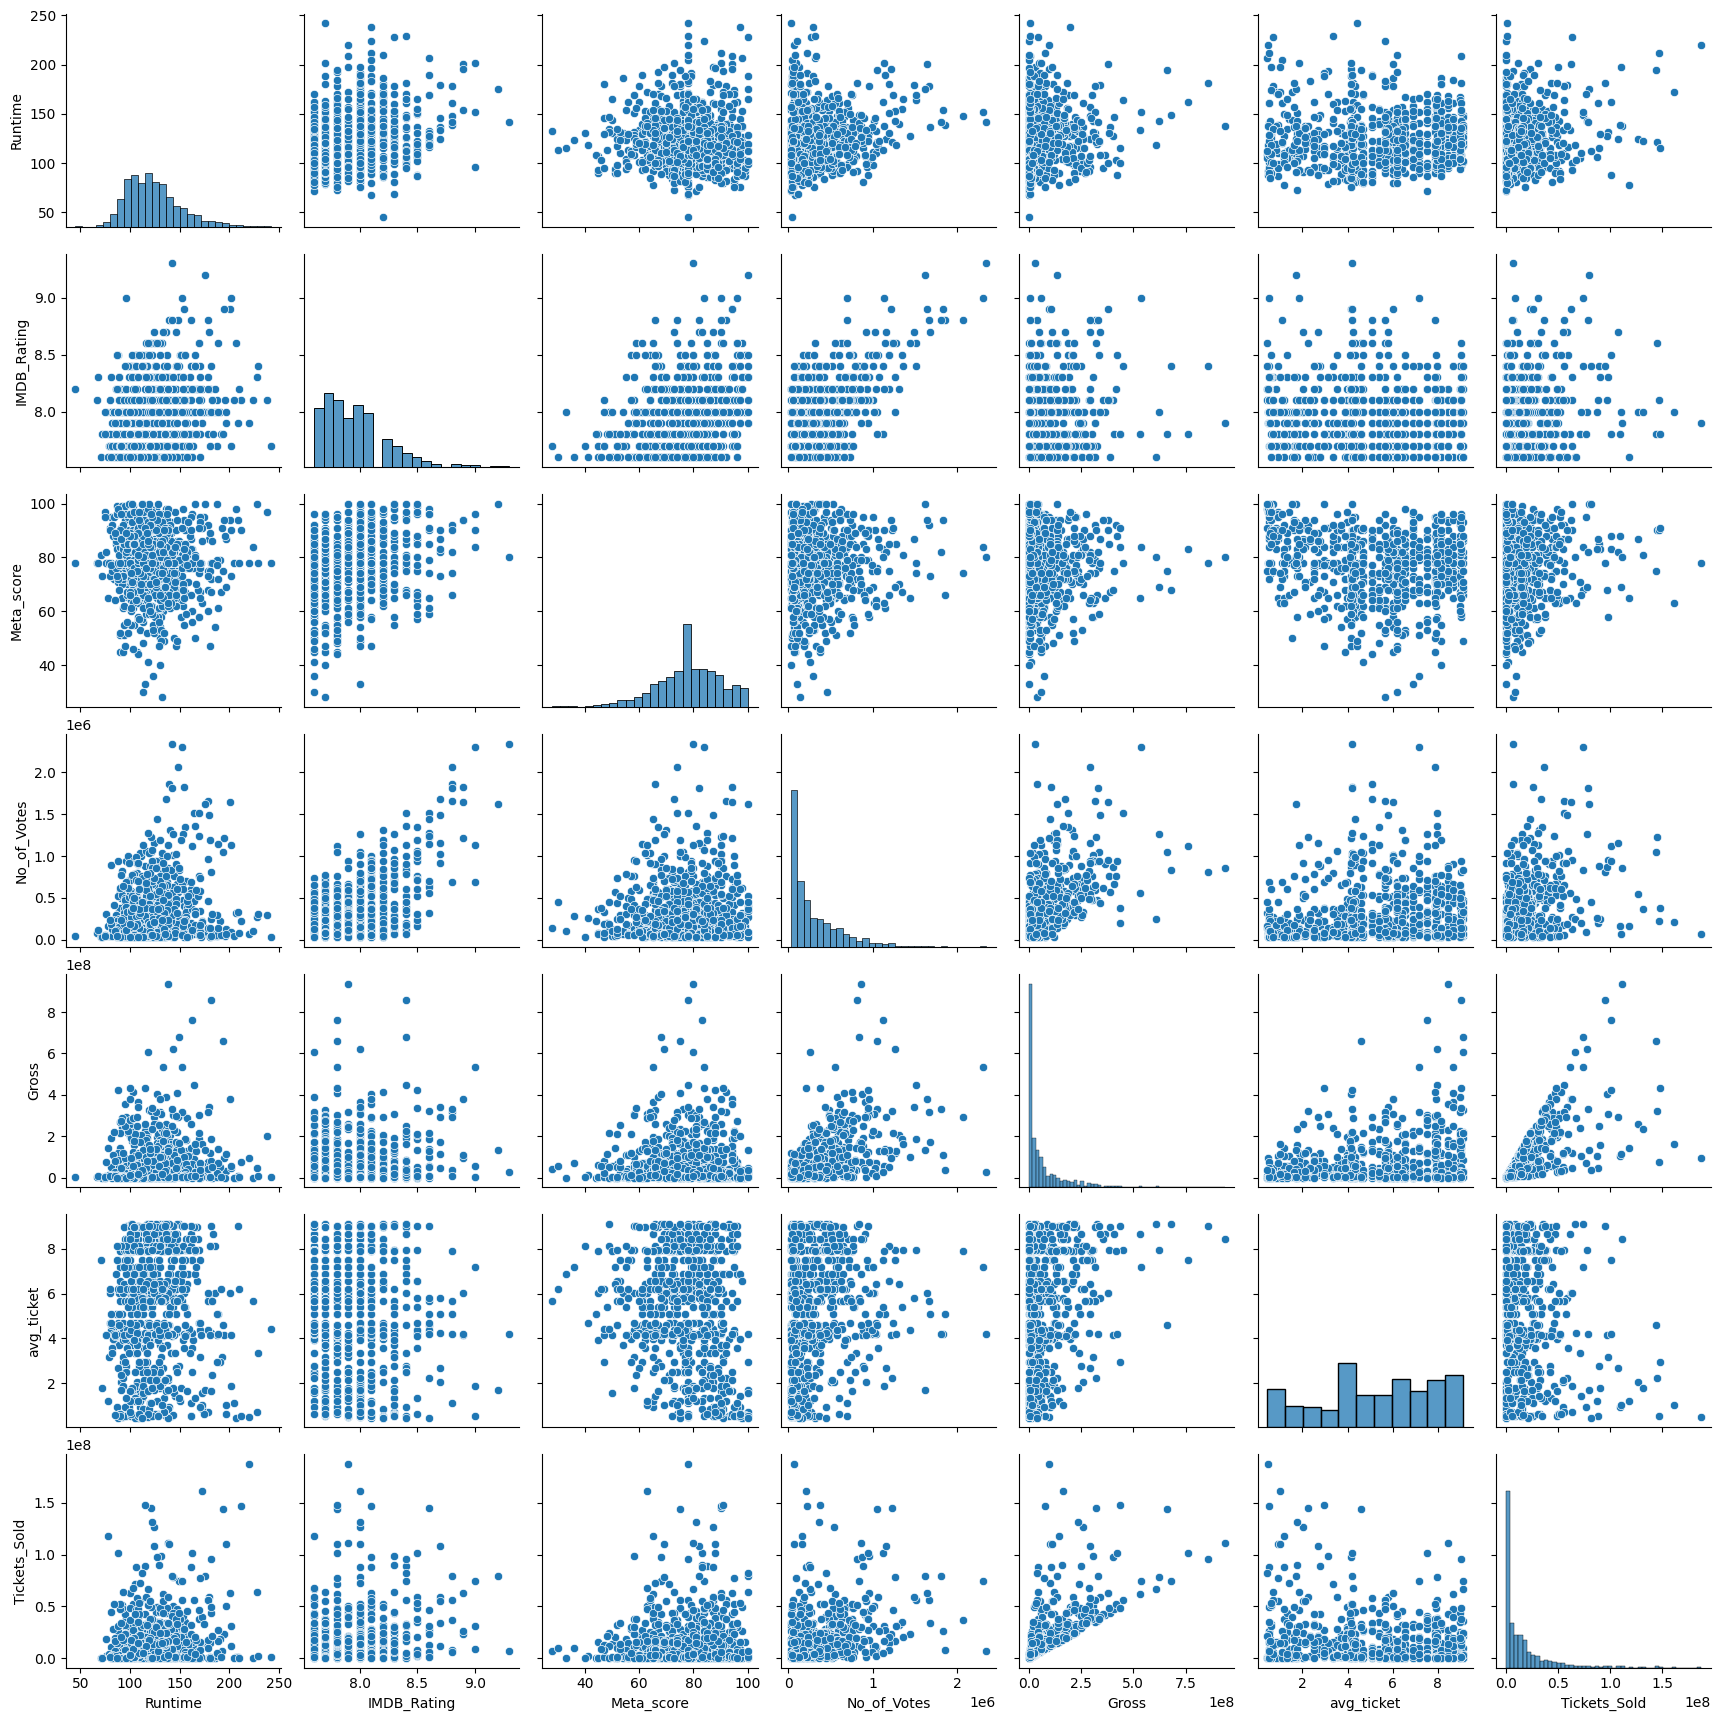

In [61]:
#Visualize df using a pairplot
import seaborn as sns
sns.pairplot(df)
plt.show()

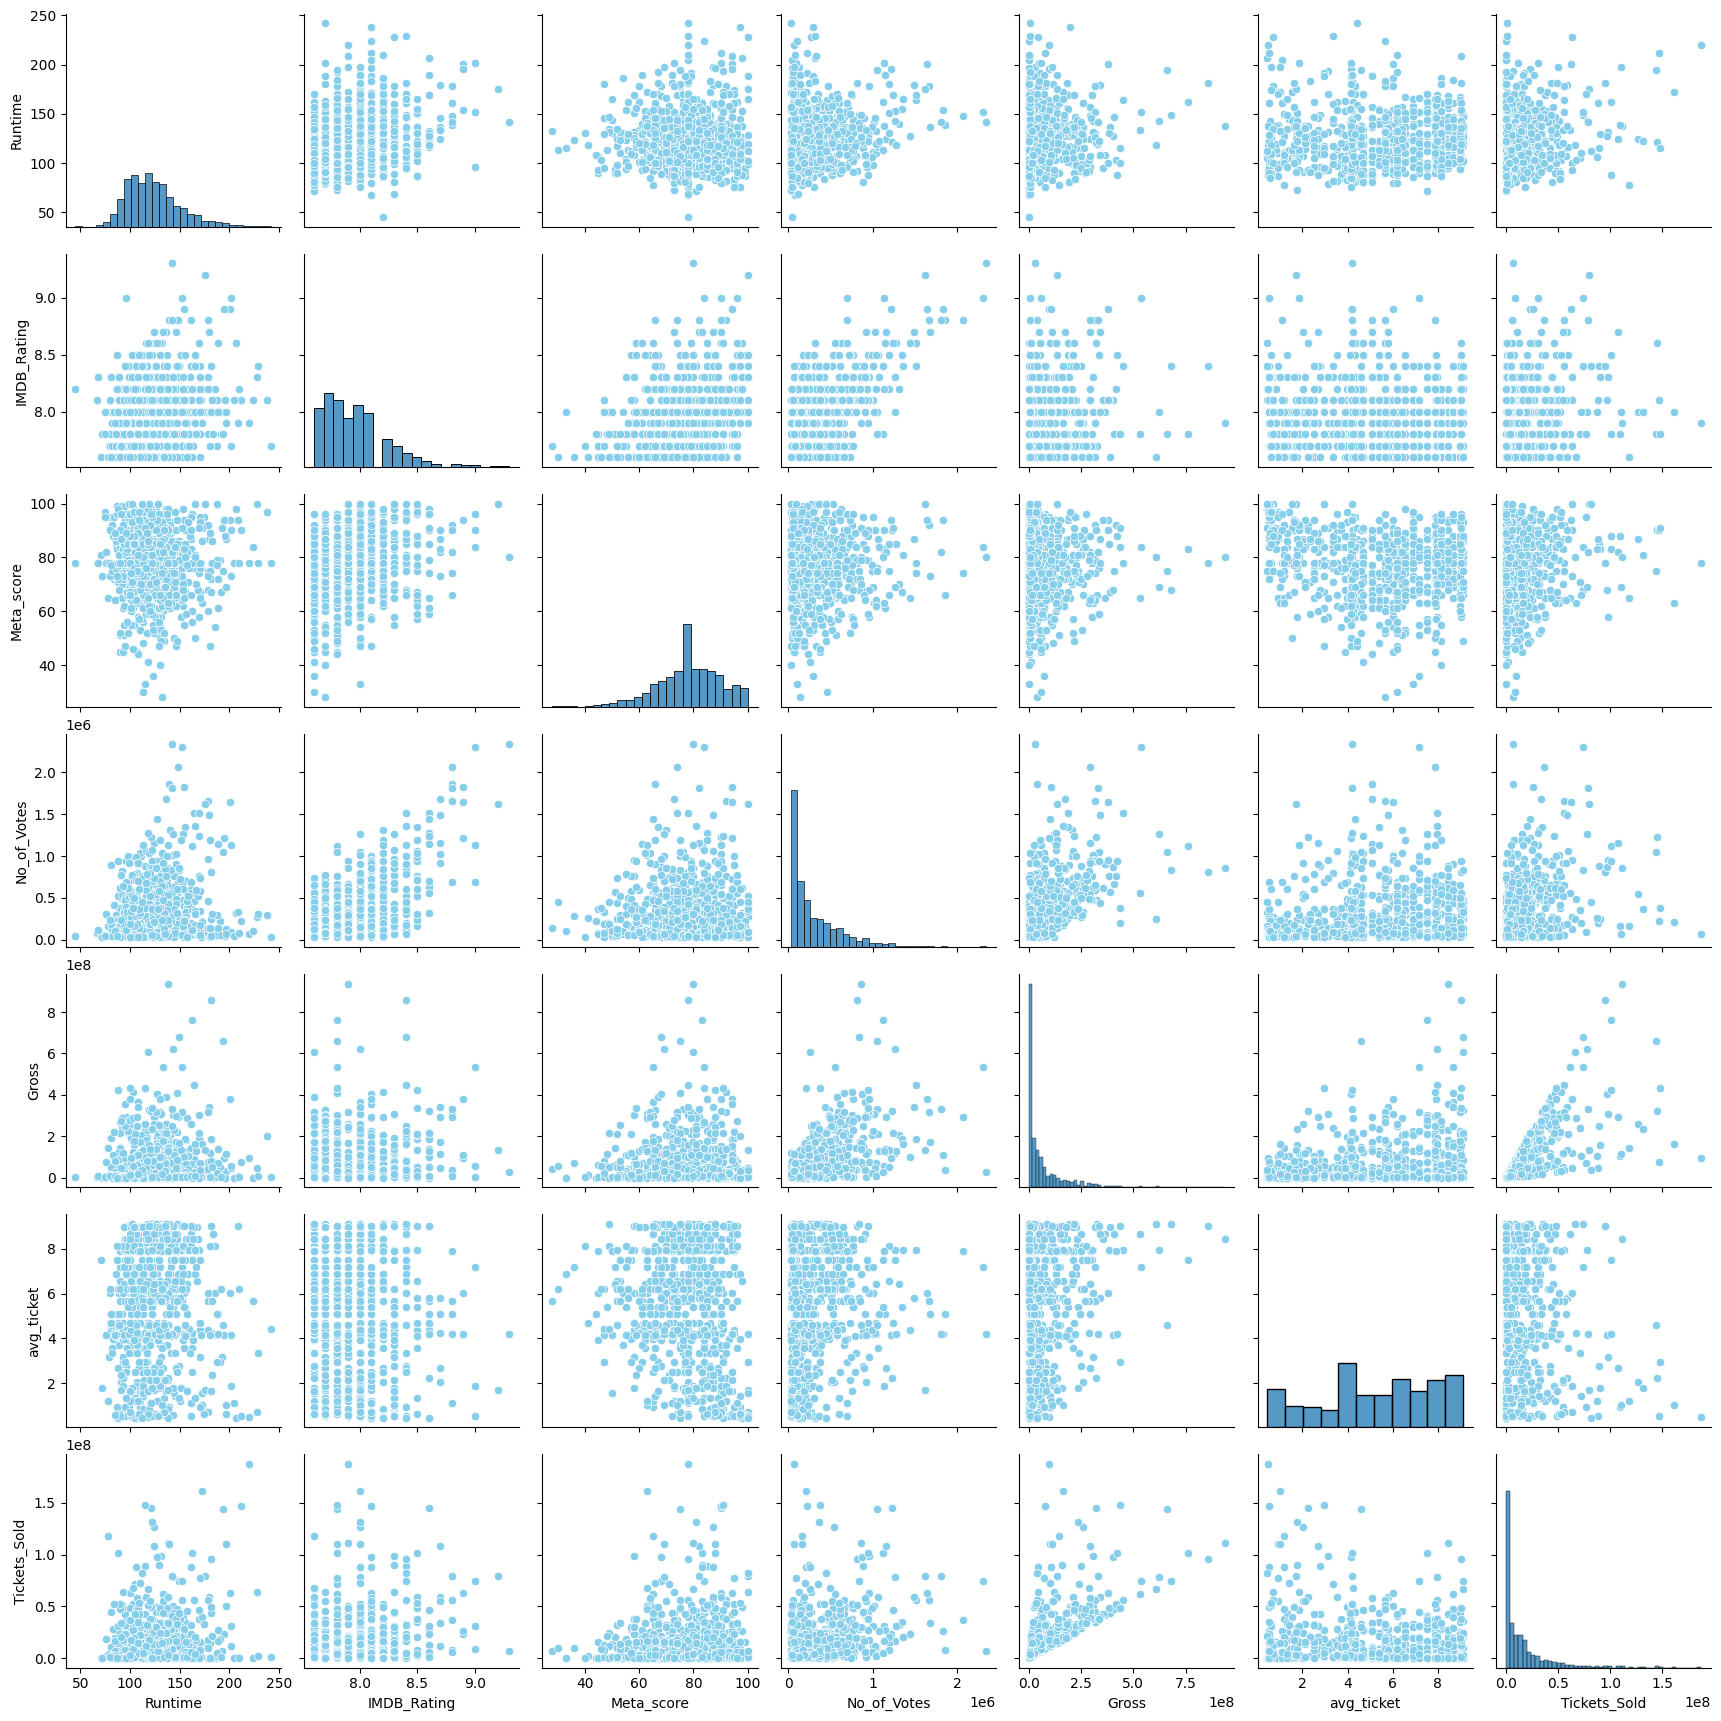

In [62]:
#Change the pairplot color to 'skyblue'
sns.pairplot(df, plot_kws={'color':'skyblue'})
plt.show()

In [63]:
#Normalize the 'IMDB_Rating', 'Meta_score', 'Tickets_Sold', 'No_of_Votes' columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df[['IMDB_Rating', 'Meta_score', 'Tickets_Sold', 'No_of_Votes']] = scaler.fit_transform(df[['IMDB_Rating', 'Meta_score', 'Tickets_Sold', 'No_of_Votes']])
df.head()

,Series_Title,Released_Year,Runtime,Genre,IMDB_Rating,Meta_score,No_of_Votes,Gross,main_genre,avg_ticket,Tickets_Sold
Index,,,,,,,,,,,
169,Indiana Jones and the Last Crusade,1989,127,"Action, Adventure",0.352941,0.513889,0.287865,197171806.0,Action,3.97,0.264910
156,Batman Begins,2005,140,"Action, Adventure",0.352941,0.583333,0.553581,206852432.0,Action,6.41,0.172126
73,Raiders of the Lost Ark,1981,115,"Action, Adventure",0.470588,0.791667,0.370585,248159971.0,Action,2.78,0.476136
841,First Blood,1982,93,"Action, Adventure",0.058824,0.458333,0.086907,47212904.0,Action,2.94,0.085655
64,The Dark Knight Rises,2012,164,"Action, Adventure",0.470588,0.694444,0.643332,448139099.0,Action,7.96,0.300292


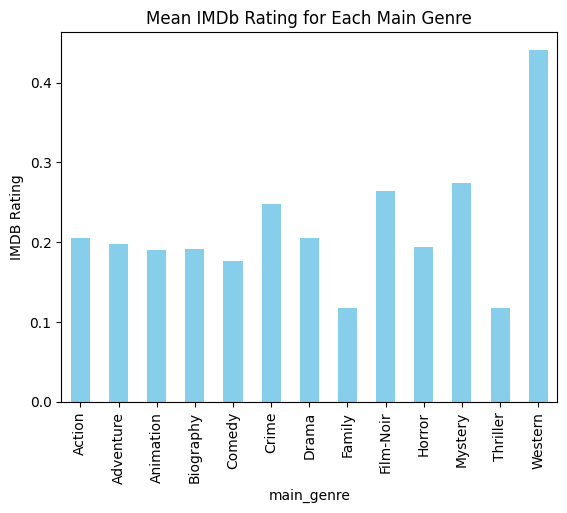

In [75]:
#Visualize the mean relationship between main genre and IMDb_Rating
df.groupby('main_genre')['IMDB_Rating'].mean().plot(kind='bar', color='skyblue')
plt.ylabel('IMDB Rating')
plt.title('Mean IMDb Rating for Each Main Genre')
plt.show()


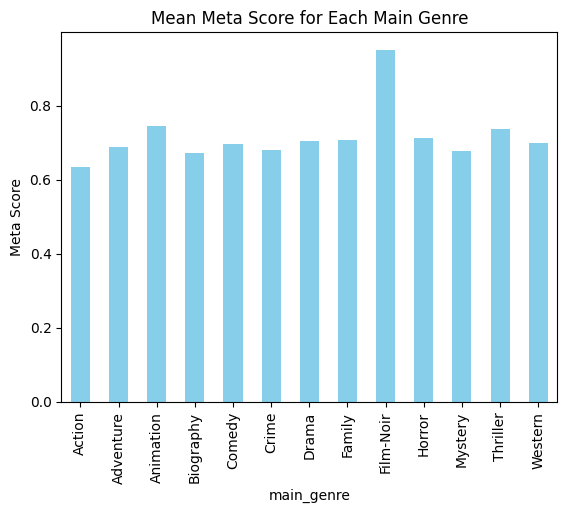

In [76]:
#Visualize the mean relationship between main genre and Meta_score
df.groupby('main_genre')['Meta_score'].mean().plot(kind='bar', color='skyblue')
plt.ylabel('Meta Score')
plt.title('Mean Meta Score for Each Main Genre')
plt.show()

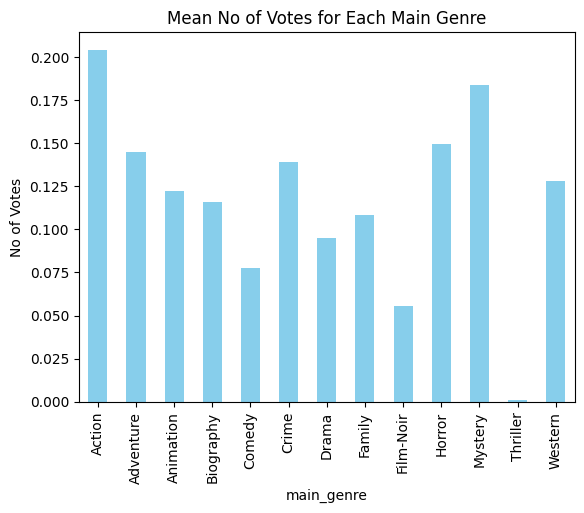

In [77]:
#visualize the mean relationship between main genre and no_of_votes
df.groupby('main_genre')['No_of_Votes'].mean().plot(kind='bar', color='skyblue')
plt.ylabel('No of Votes')
plt.title('Mean No of Votes for Each Main Genre')
plt.show()

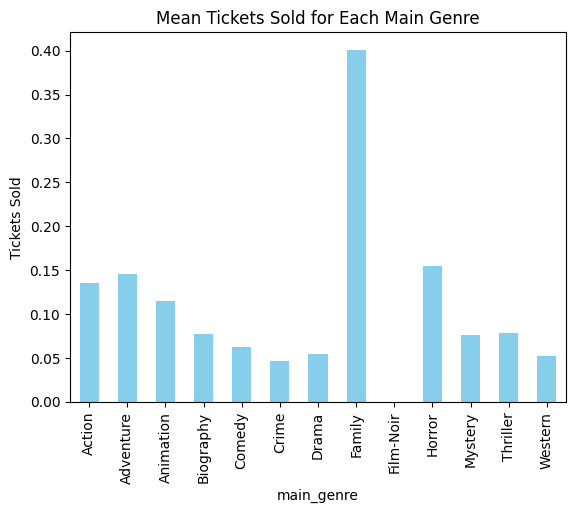

In [78]:
#Visualize the mean relationship between main genre and Tickets_Sold
df.groupby('main_genre')['Tickets_Sold'].mean().plot(kind='bar', color='skyblue')
plt.ylabel('Tickets Sold')
plt.title('Mean Tickets Sold for Each Main Genre')
plt.show()

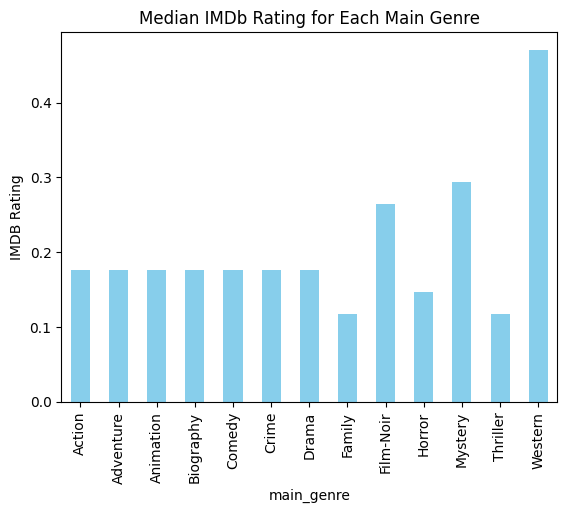

In [79]:
#Visualize the median relationship between main genre and IMDb_Rating
df.groupby('main_genre')['IMDB_Rating'].median().plot(kind='bar', color='skyblue')
plt.ylabel('IMDB Rating')
plt.title('Median IMDb Rating for Each Main Genre')
plt.show()

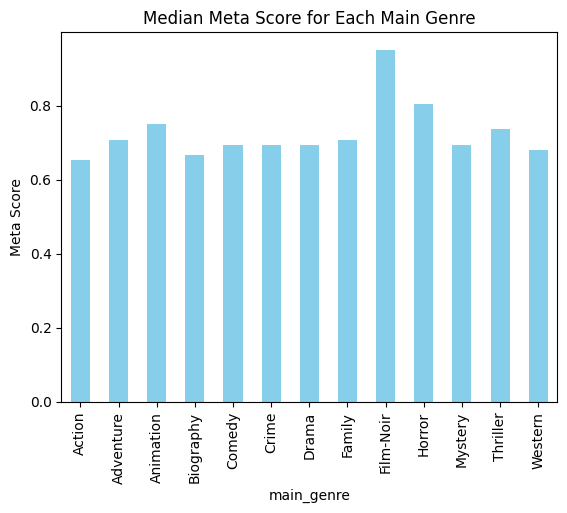

In [80]:
#Visualize the median relationship between main genre and Meta_score
df.groupby('main_genre')['Meta_score'].median().plot(kind='bar', color='skyblue')
plt.ylabel('Meta Score')
plt.title('Median Meta Score for Each Main Genre')
plt.show()

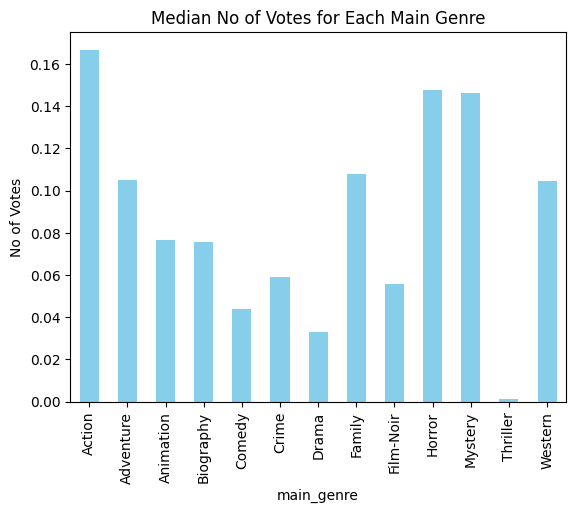

In [81]:
#Visualize the median relationship between main genre and No_of_Votes
df.groupby('main_genre')['No_of_Votes'].median().plot(kind='bar', color='skyblue')
plt.ylabel('No of Votes')
plt.title('Median No of Votes for Each Main Genre')
plt.show()

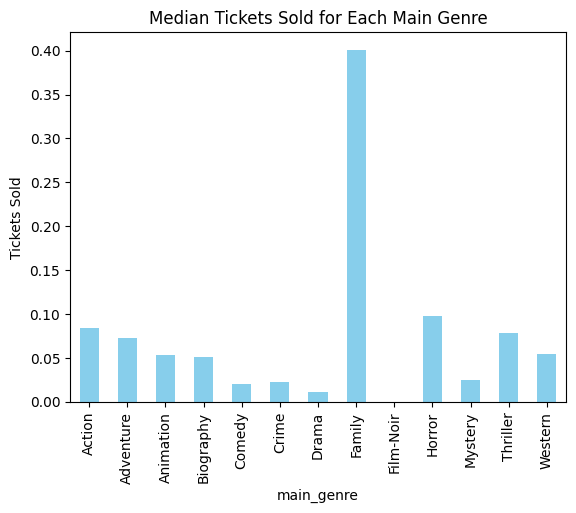

In [82]:
#Visualize the median relationship between main genre and Tickets_Sold
df.groupby('main_genre')['Tickets_Sold'].median().plot(kind='bar', color='skyblue')
plt.ylabel('Tickets Sold')
plt.title('Median Tickets Sold for Each Main Genre')
plt.show()

In [83]:
#Extract the following columns into a new dataframe: 'IMDB_Rating', 'Meta_score', 'Main_Genre', 'Tickets_Sold', 'No_of_Votes'
df_new = df[['IMDB_Rating', 'Meta_score', 'main_genre', 'Tickets_Sold', 'No_of_Votes']]
df_new.head()

,IMDB_Rating,Meta_score,main_genre,Tickets_Sold,No_of_Votes
Index,,,,,
169,0.352941,0.513889,Action,0.264910,0.287865
156,0.352941,0.583333,Action,0.172126,0.553581
73,0.470588,0.791667,Action,0.476136,0.370585
841,0.058824,0.458333,Action,0.085655,0.086907
64,0.470588,0.694444,Action,0.300292,0.643332


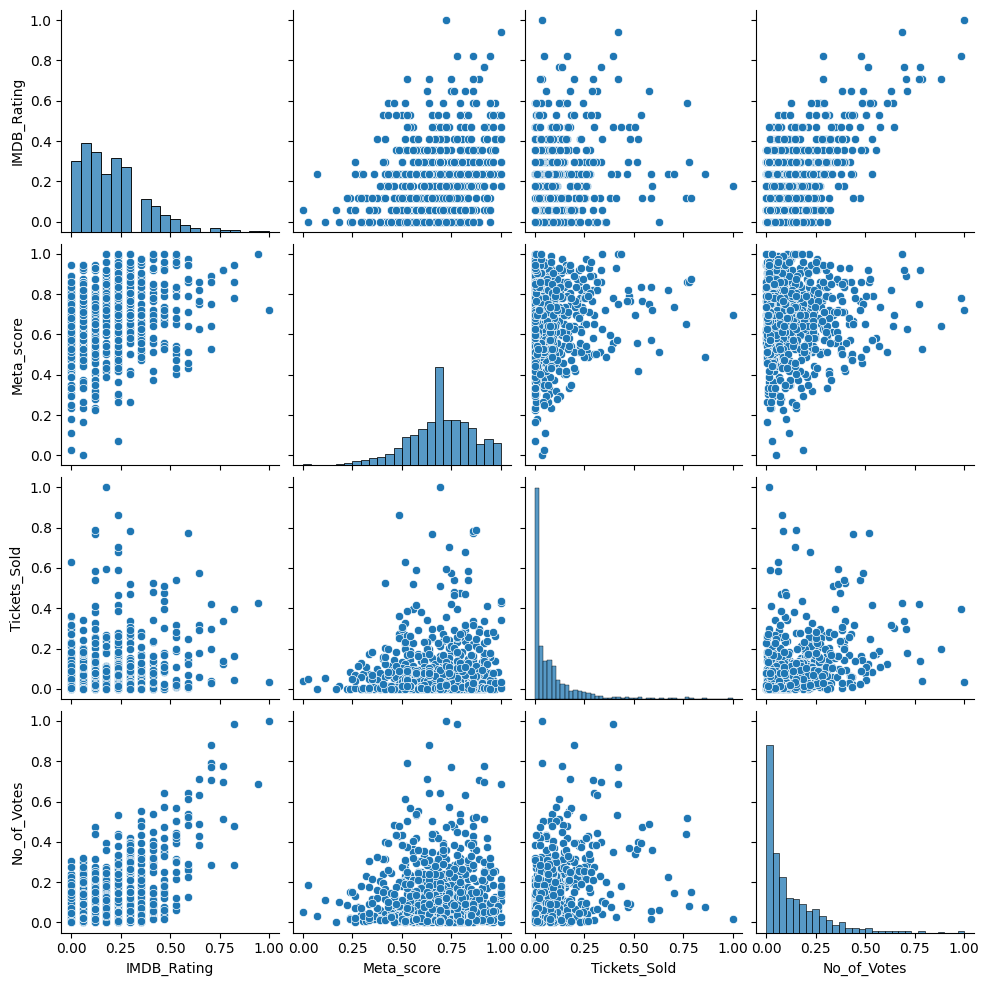

In [84]:
#Visualize this new DataFrame using a pairplot
sns.pairplot(df_new)
plt.show()

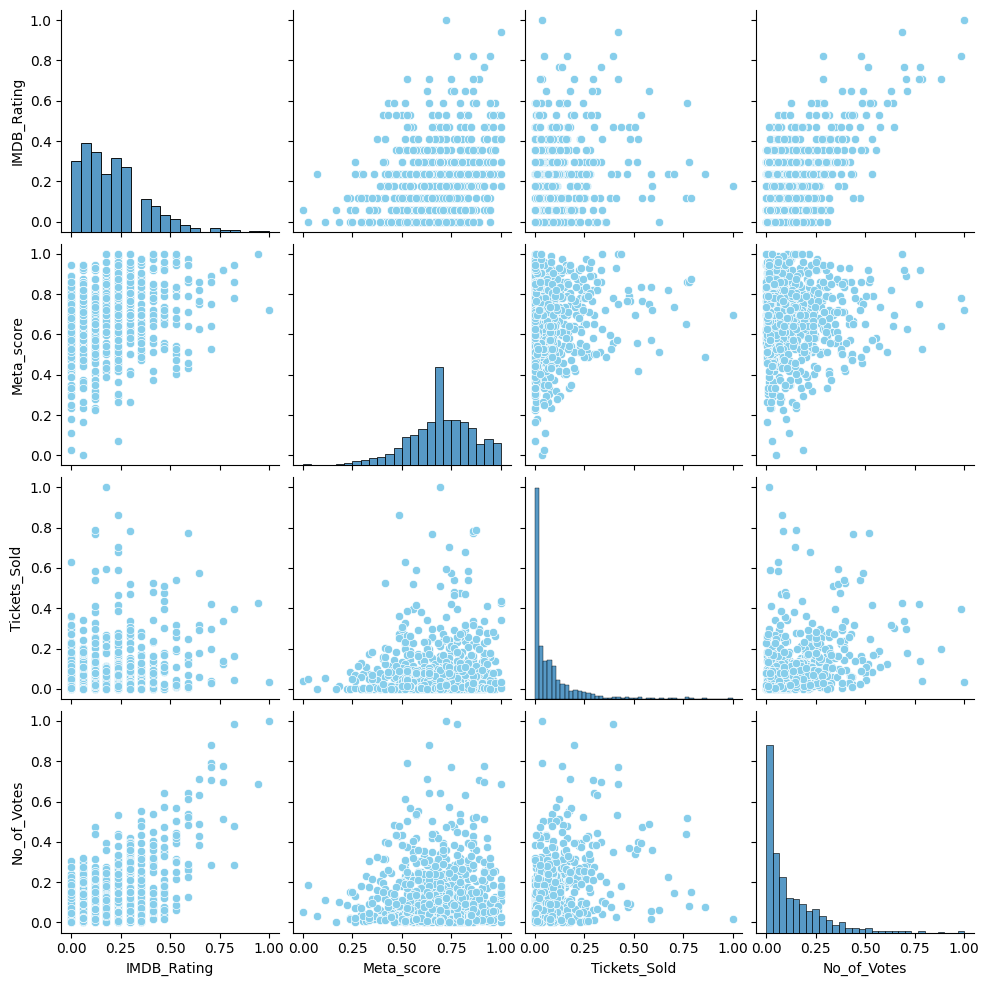

In [85]:
#Change the pairplot color to 'skyblue'
sns.pairplot(df_new, plot_kws={'color':'skyblue'})
plt.show()

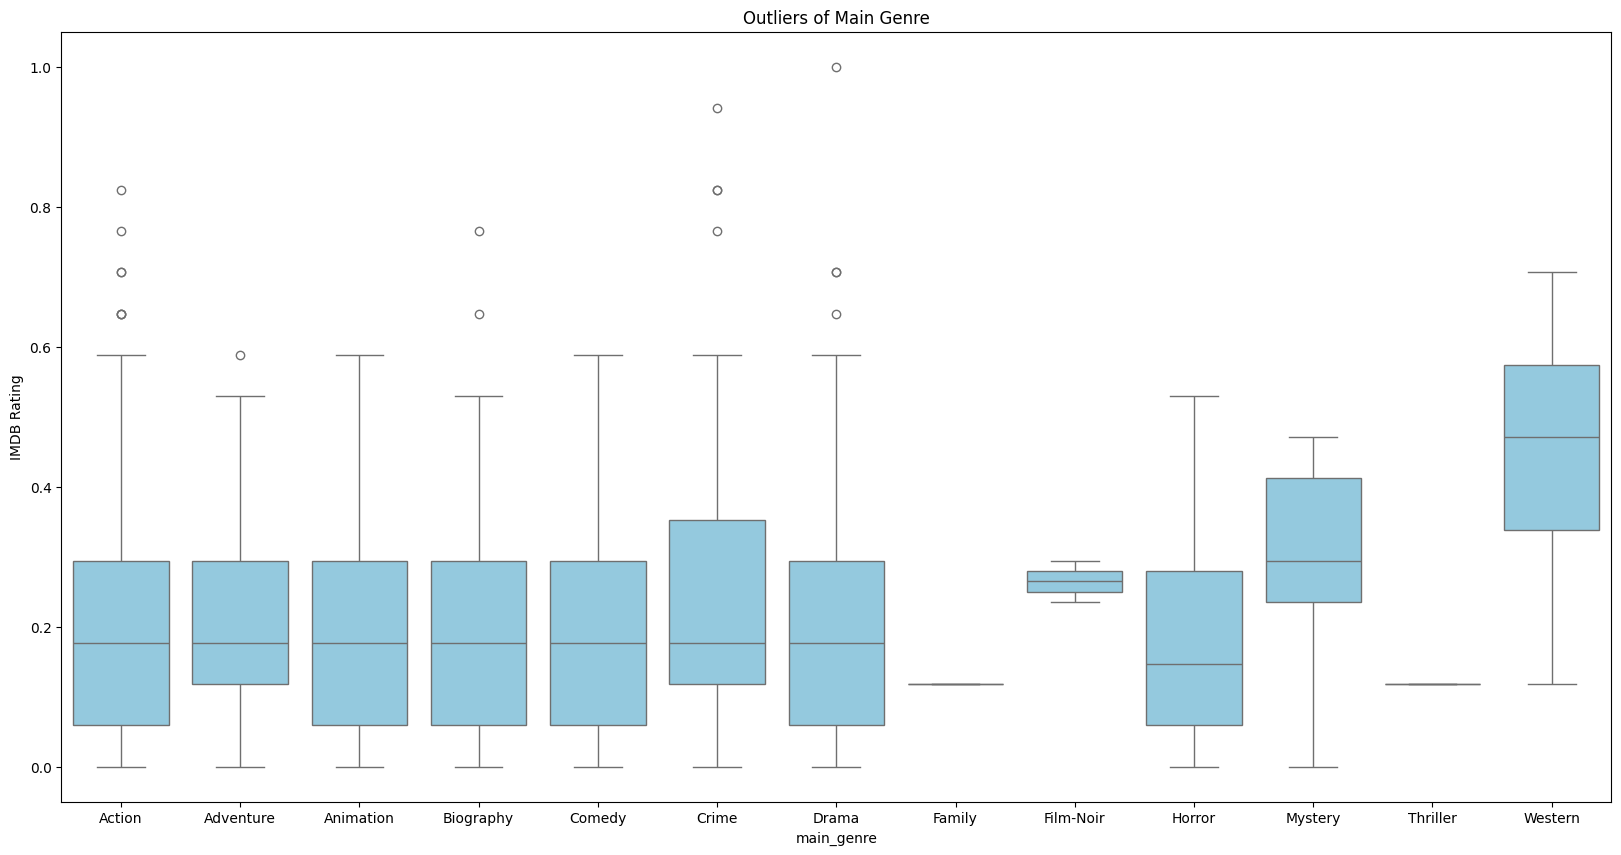

In [93]:
#Visualize the outliers of main_genre, using the 'IMDB_Rating' column
plt.figure(figsize=(20, 10))
sns.boxplot(x='main_genre', y='IMDB_Rating', data=df, color='skyblue')
plt.ylabel('IMDB Rating')
plt.title('Outliers of Main Genre')
plt.show()

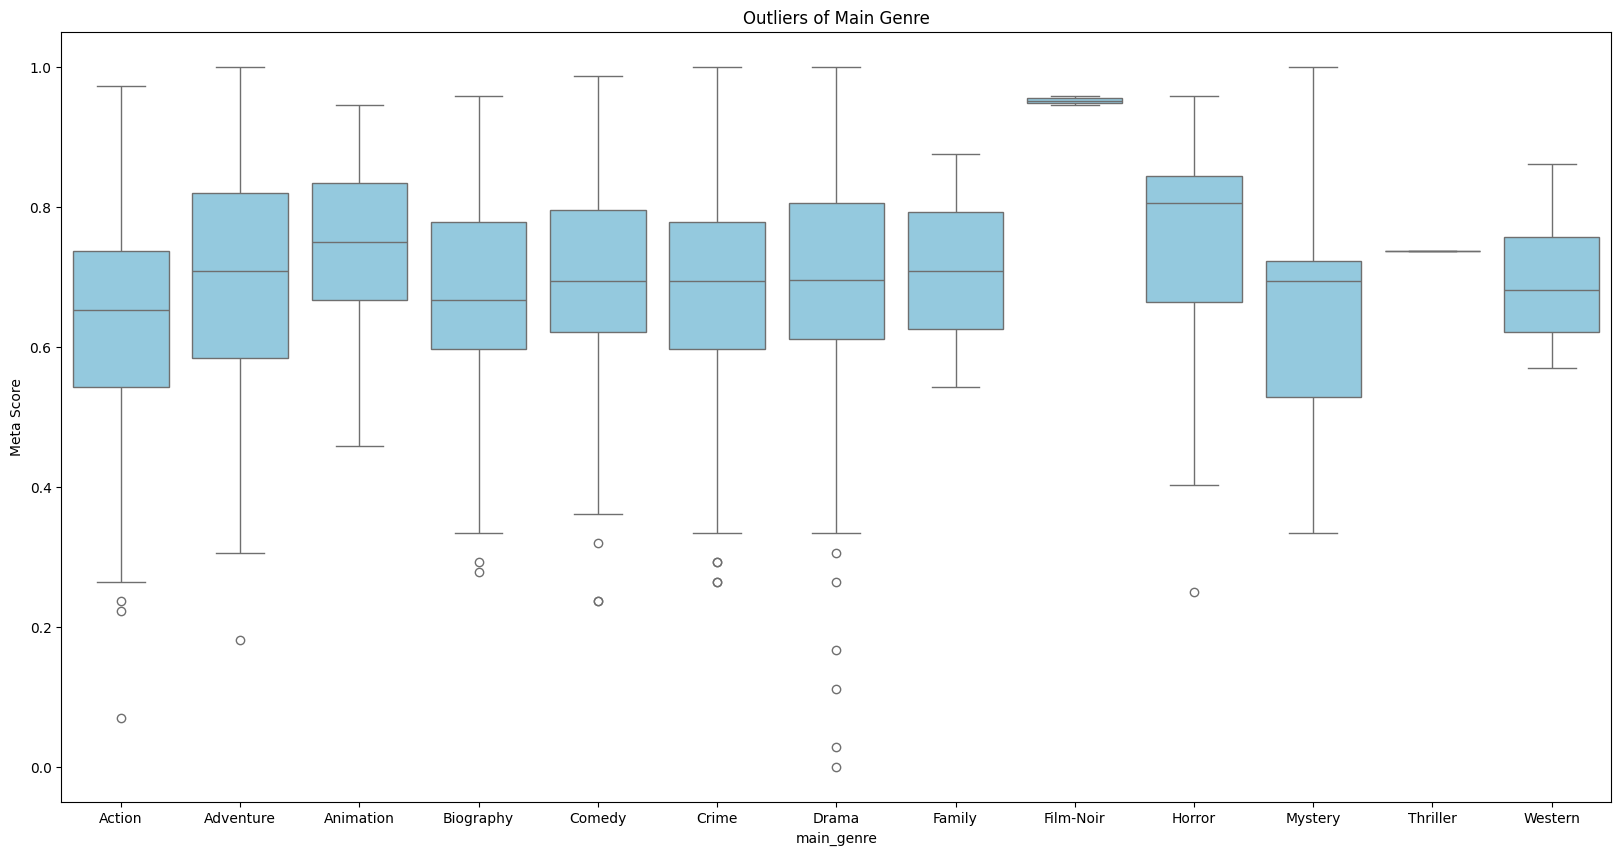

In [94]:
#Visualize the outliers of main_genre, using the 'Meta_score' column
plt.figure(figsize=(20, 10))
sns.boxplot(x='main_genre', y='Meta_score', data=df, color='skyblue')
plt.ylabel('Meta Score')
plt.title('Outliers of Main Genre')
plt.show()

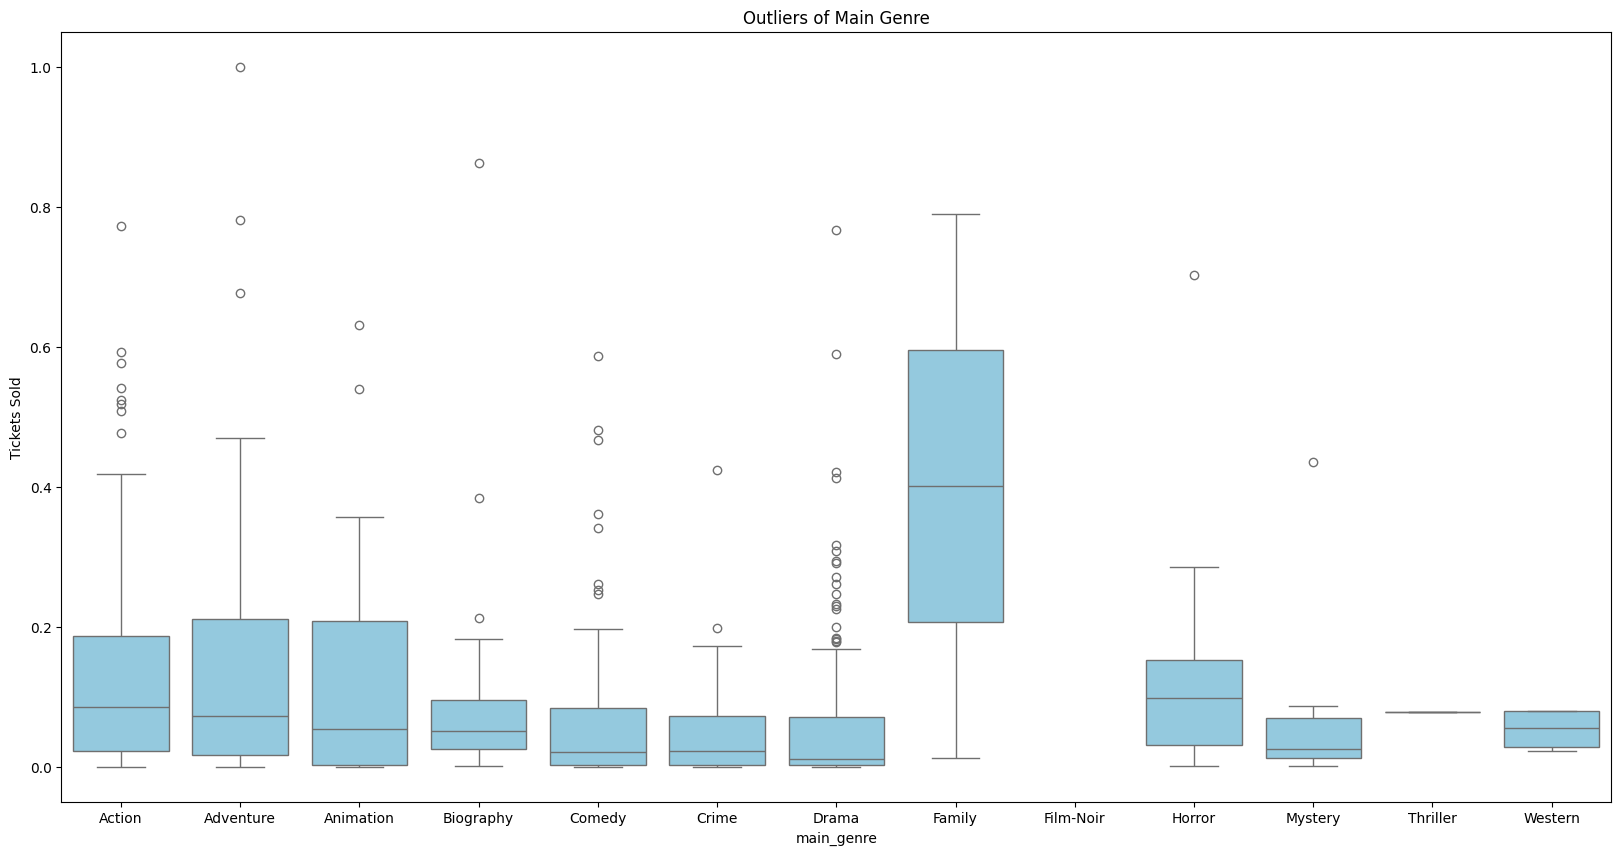

In [95]:
#Visualize the outliers of main_genre, using the 'Tickets_Sold' column
plt.figure(figsize=(20, 10))
sns.boxplot(x='main_genre', y='Tickets_Sold', data=df, color='skyblue')
plt.ylabel('Tickets Sold')
plt.title('Outliers of Main Genre')
plt.show()

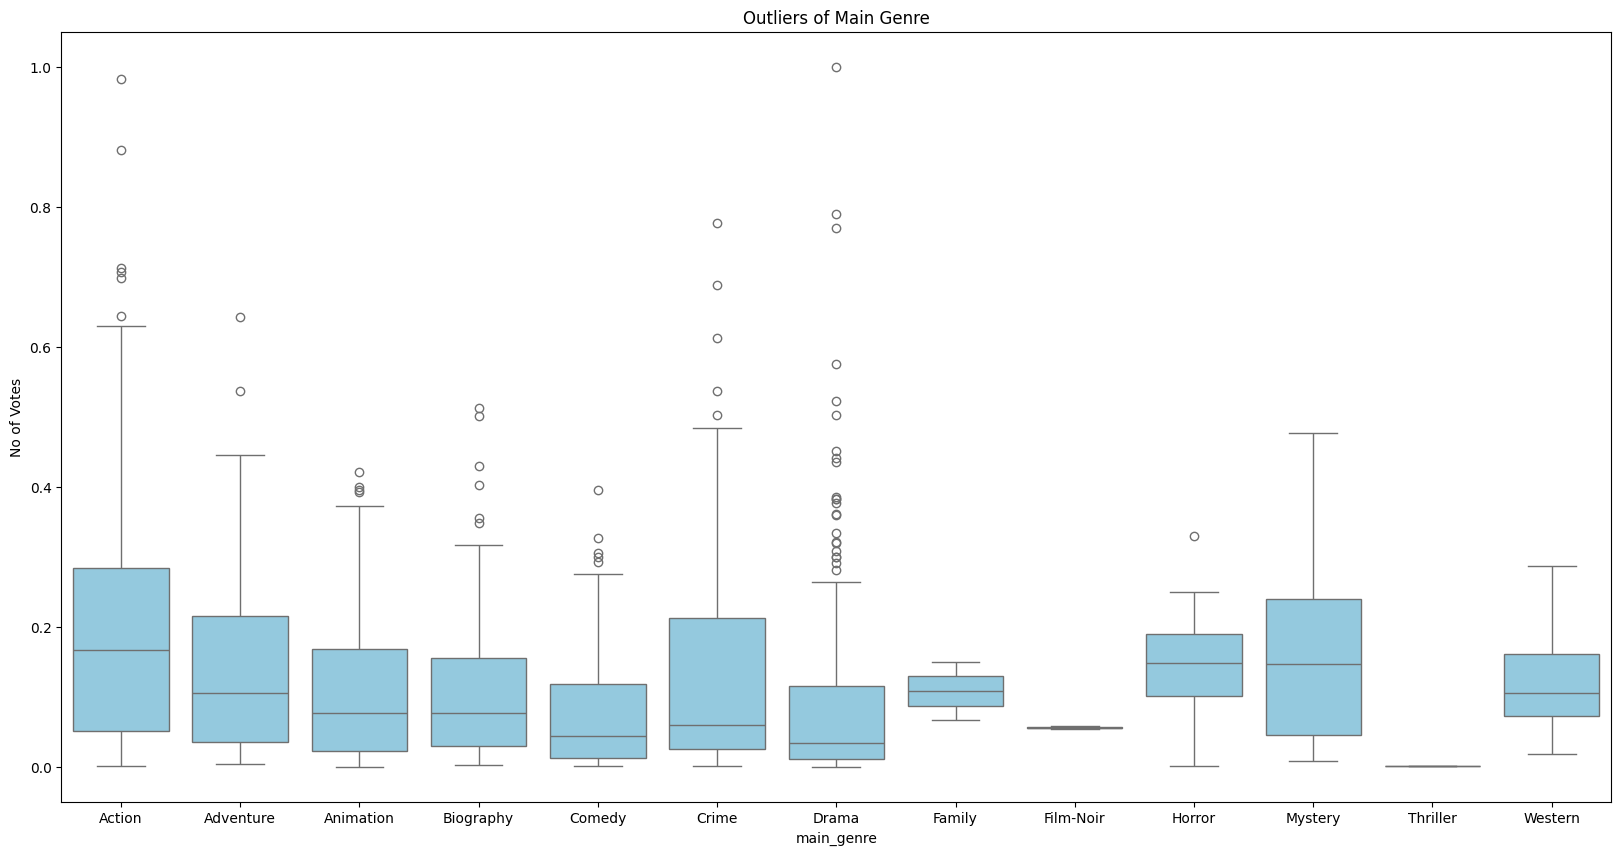

In [96]:
#Visualize the outliers of main_genre, using the 'No_of_Votes' column
plt.figure(figsize=(20, 10))
sns.boxplot(x='main_genre', y='No_of_Votes', data=df, color='skyblue')
plt.ylabel('No of Votes')
plt.title('Outliers of Main Genre')
plt.show()